In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline

In [4]:
df = pd.read_csv('kc_house_data.csv')

In [5]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [6]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  int64  
 9   view           21597 non-null  int64  
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  int64  
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  int64  
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [8]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007547,0.234292,3.409825,7.657915,1788.596842,291.725008,1970.999676,84.464787,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086549,0.766390,0.650546,1.173200,827.759761,442.667800,29.375234,401.821438,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


# EDA

<AxesSubplot:xlabel='price', ylabel='Count'>

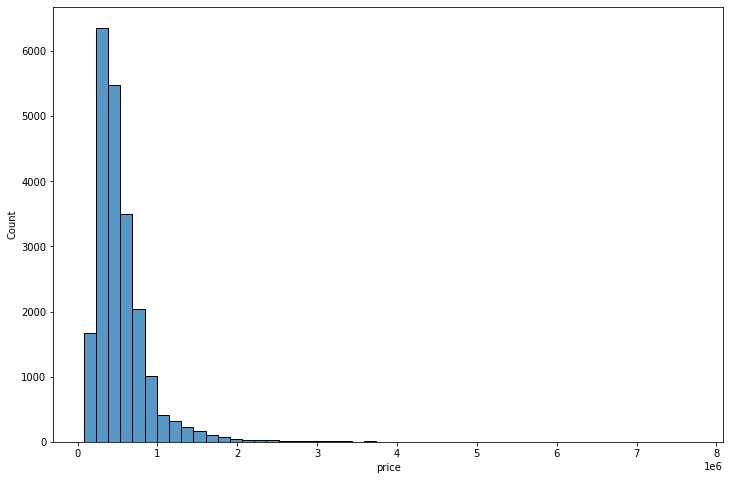

In [26]:
plt.figure(figsize = (12,8))
sns.histplot(df['price'], bins = 50)

<AxesSubplot:xlabel='bedrooms', ylabel='count'>

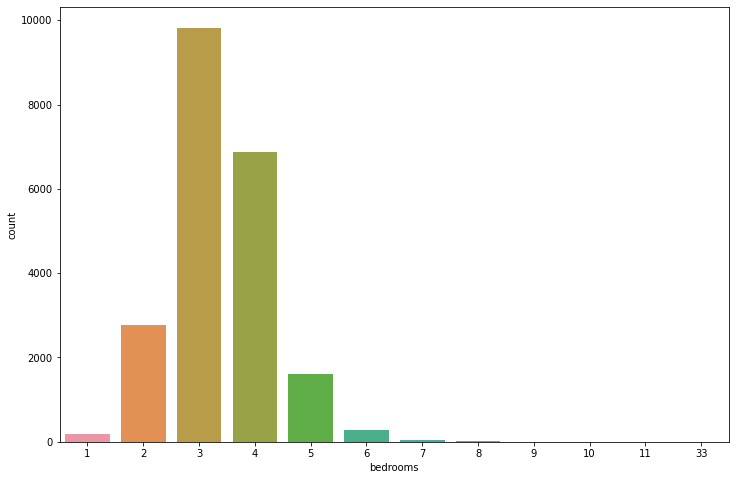

In [29]:
plt.figure(figsize = (12,8))
sns.countplot(x = 'bedrooms', data =df)

In [34]:
df.corr()['price'].sort_values()

zipcode         -0.053402
id              -0.016772
long             0.022036
condition        0.036056
yr_built         0.053953
sqft_lot15       0.082845
sqft_lot         0.089876
yr_renovated     0.126424
floors           0.256804
waterfront       0.266398
lat              0.306692
bedrooms         0.308787
sqft_basement    0.323799
view             0.397370
bathrooms        0.525906
sqft_living15    0.585241
sqft_above       0.605368
grade            0.667951
sqft_living      0.701917
price            1.000000
Name: price, dtype: float64

<AxesSubplot:xlabel='price', ylabel='sqft_living'>

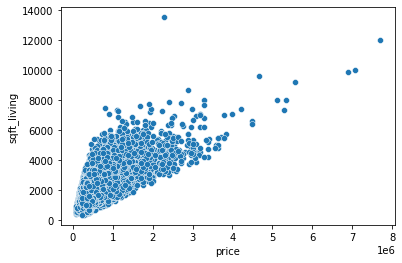

In [40]:
sns.scatterplot(x='price', y='sqft_living', data=df)

<AxesSubplot:xlabel='price', ylabel='bathrooms'>

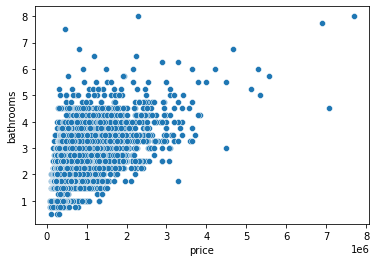

In [42]:
sns.scatterplot(x='price', y='bathrooms', data=df)

<AxesSubplot:xlabel='price', ylabel='bedrooms'>

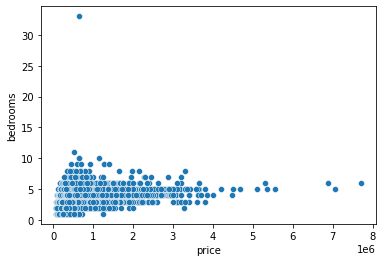

In [43]:
sns.scatterplot(x='price', y='bedrooms', data=df)

<AxesSubplot:xlabel='price', ylabel='floors'>

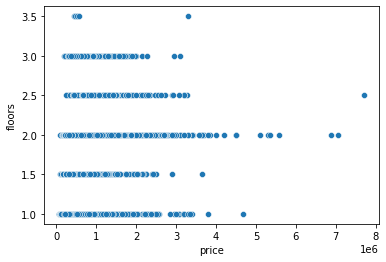

In [44]:
sns.scatterplot(x='price', y='floors', data=df)

<AxesSubplot:xlabel='price', ylabel='long'>

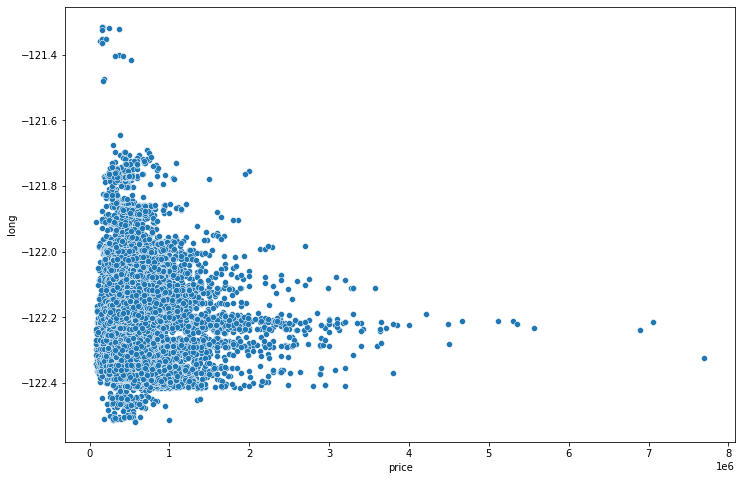

In [46]:
plt.figure(figsize = (12,8))
sns.scatterplot(x='price', y='long', data=df)

<AxesSubplot:xlabel='price', ylabel='lat'>

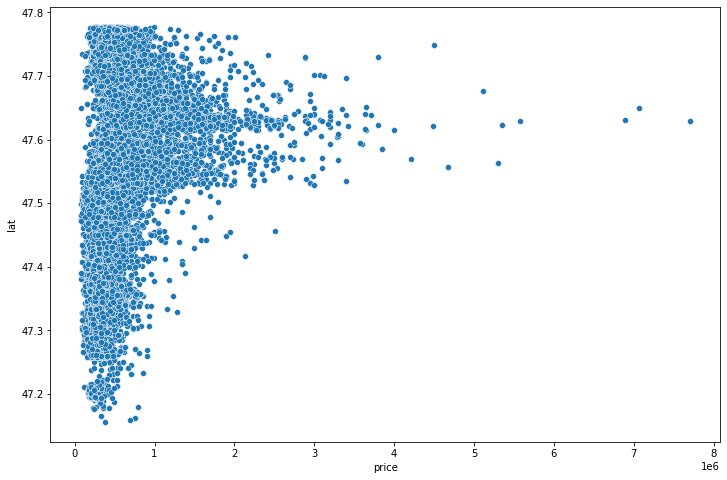

In [47]:
plt.figure(figsize = (12,8))
sns.scatterplot(x='price', y='lat', data=df)

<AxesSubplot:xlabel='long', ylabel='lat'>

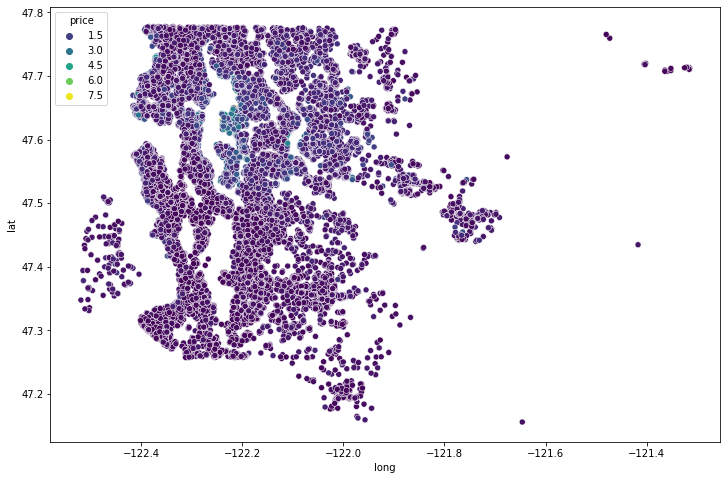

In [50]:
plt.figure(figsize = (12,8))
sns.scatterplot(x='long', y='lat', data=df, hue='price', palette='viridis')

In [53]:
df.sort_values('price', ascending=False).head(20)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,6762700020,10/13/2014,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3910,9808700762,6/11/2014,7060000.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9245,9208900037,9/19/2014,6890000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4407,2470100110,8/4/2014,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1446,8907500070,4/13/2015,5350000.0,5,5.00,8000,23985,2.0,0,4,...,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
1313,7558700030,4/13/2015,5300000.0,6,6.00,7390,24829,2.0,1,4,...,12,5000,2390,1991,0,98040,47.5631,-122.210,4320,24619
1162,1247600105,10/20/2014,5110000.0,5,5.25,8010,45517,2.0,1,4,...,12,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788
8085,1924059029,6/17/2014,4670000.0,5,6.75,9640,13068,1.0,1,4,...,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454
2624,7738500731,8/15/2014,4500000.0,5,5.50,6640,40014,2.0,1,4,...,12,6350,290,2004,0,98155,47.7493,-122.280,3030,23408
8629,3835500195,6/18/2014,4490000.0,4,3.00,6430,27517,2.0,0,0,...,12,6430,0,2001,0,98004,47.6208,-122.219,3720,14592


In [56]:
len(df)*0.01

215.97

In [57]:
non_top_1perc = df.sort_values('price', ascending=False).iloc[216:]

<AxesSubplot:xlabel='long', ylabel='lat'>

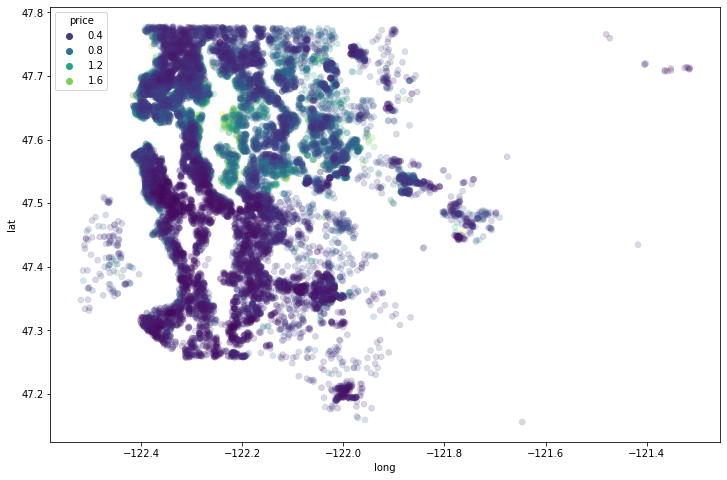

In [63]:
plt.figure(figsize = (12,8))
sns.scatterplot(x='long', y='lat', data=non_top_1perc, hue='price', 
                edgecolor = None, alpha = 0.2 ,palette='viridis')

<AxesSubplot:xlabel='waterfront', ylabel='price'>

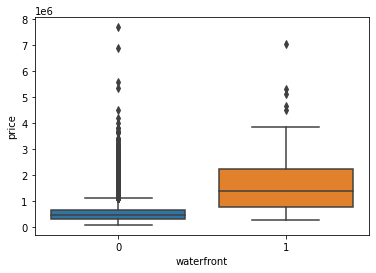

In [72]:
sns.boxplot(x='waterfront', y='price', data=df)

# Feature Engineering

In [83]:
df.corr()['price'].sort_values()

zipcode         -0.053402
id              -0.016772
long             0.022036
condition        0.036056
yr_built         0.053953
sqft_lot15       0.082845
sqft_lot         0.089876
yr_renovated     0.126424
floors           0.256804
waterfront       0.266398
lat              0.306692
bedrooms         0.308787
sqft_basement    0.323799
view             0.397370
bathrooms        0.525906
sqft_living15    0.585241
sqft_above       0.605368
grade            0.667951
sqft_living      0.701917
price            1.000000
Name: price, dtype: float64

In [84]:
df = df.drop('id', axis =1)

In [86]:
df['date'] = pd.to_datetime(df['date'])

In [88]:
df['year'] = df['date'].apply(lambda date: date.year)
df['month'] = df['date'].apply(lambda date: date.month)

In [89]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


<AxesSubplot:xlabel='month', ylabel='price'>

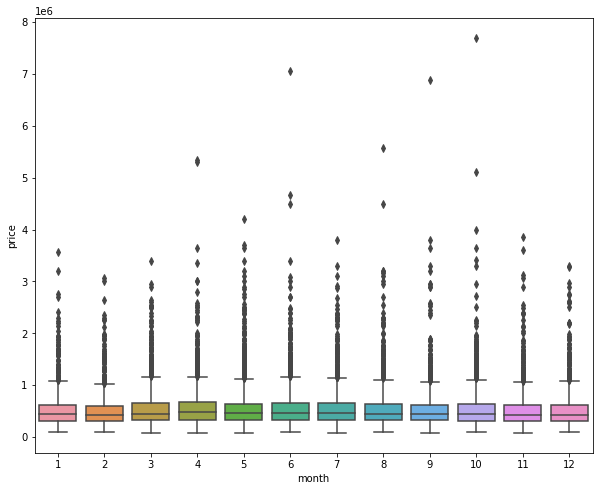

In [94]:
plt.figure(figsize = (10,8))
sns.boxplot(x='month', y='price', data=df)

<AxesSubplot:xlabel='month'>

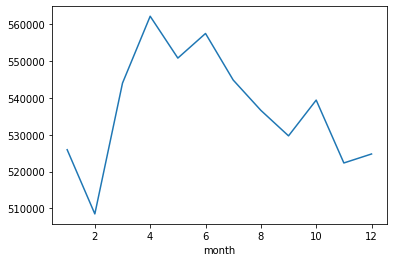

In [106]:
df.groupby('month').mean()['price'].plot()

<AxesSubplot:xlabel='year'>

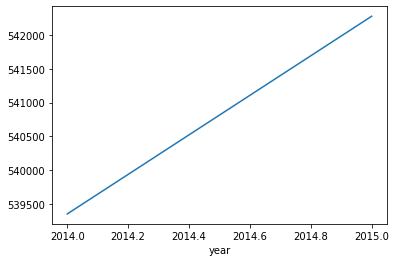

In [107]:
df.groupby('year').mean()['price'].plot()

In [108]:
df = df.drop('date', axis=1)

In [109]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


In [114]:
df['yr_renovated'].value_counts()

0       20683
2014       91
2013       37
2003       36
2007       35
        ...  
1948        1
1954        1
1951        1
1944        1
1959        1
Name: yr_renovated, Length: 70, dtype: int64

In [115]:
df = df.drop('zipcode', axis=1)

# Model Selection

In [133]:
X = df.drop('price', axis =1).values
y = df['price'].values

In [134]:
from sklearn.model_selection import train_test_split

In [135]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [136]:
from sklearn.preprocessing import MinMaxScaler

In [137]:
scaler = MinMaxScaler()

In [138]:
X_train = scaler.fit_transform(X_train)

In [139]:
X_test = scaler.transform(X_test)

In [140]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [141]:
model = Sequential()

model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))

model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

In [143]:
model.fit(x=X_train,y=y_train,validation_data=(X_test,y_test), 
          batch_size=128, epochs=400)

Epoch 1/400
119/119 [==============================] - 2s 4ms/step - loss: 430231584768.0000 - val_loss: 418861023232.0000
Epoch 2/400
119/119 [==============================] - 0s 1ms/step - loss: 428245778432.0000 - val_loss: 411859189760.0000
Epoch 3/400
119/119 [==============================] - 0s 1ms/step - loss: 399784378368.0000 - val_loss: 347507064832.0000
Epoch 4/400
119/119 [==============================] - 0s 2ms/step - loss: 274351325184.0000 - val_loss: 171706204160.0000
Epoch 5/400
119/119 [==============================] - 0s 1ms/step - loss: 124446105600.0000 - val_loss: 96693706752.0000
Epoch 6/400
119/119 [==============================] - 0s 932us/step - loss: 98635087872.0000 - val_loss: 94229078016.0000
Epoch 7/400
119/119 [==============================] - 0s 941us/step - loss: 96190087168.0000 - val_loss: 91934711808.0000
Epoch 8/400
119/119 [==============================] - 0s 915us/step - loss: 93754490880.0000 - val_loss: 89568288768.0000
Epoch 9/400
119/1

119/119 [==============================] - 0s 966us/step - loss: 35912732672.0000 - val_loss: 34585350144.0000
Epoch 68/400
119/119 [==============================] - 0s 932us/step - loss: 35745607680.0000 - val_loss: 34475507712.0000
Epoch 69/400
119/119 [==============================] - 0s 949us/step - loss: 35617316864.0000 - val_loss: 34410229760.0000
Epoch 70/400
119/119 [==============================] - 0s 958us/step - loss: 35519660032.0000 - val_loss: 34291286016.0000
Epoch 71/400
119/119 [==============================] - 0s 958us/step - loss: 35451318272.0000 - val_loss: 34182127616.0000
Epoch 72/400
119/119 [==============================] - 0s 975us/step - loss: 35400892416.0000 - val_loss: 34126960640.0000
Epoch 73/400
119/119 [==============================] - 0s 924us/step - loss: 35263995904.0000 - val_loss: 34006614016.0000
Epoch 74/400
119/119 [==============================] - 0s 1ms/step - loss: 35253882880.0000 - val_loss: 34006435840.0000
Epoch 75/400
119/119 [=

119/119 [==============================] - 0s 932us/step - loss: 32606003200.0000 - val_loss: 30900305920.0000
Epoch 134/400
119/119 [==============================] - 0s 958us/step - loss: 32527577088.0000 - val_loss: 30866870272.0000
Epoch 135/400
119/119 [==============================] - 0s 966us/step - loss: 32511051776.0000 - val_loss: 30947184640.0000
Epoch 136/400
119/119 [==============================] - 0s 949us/step - loss: 32503322624.0000 - val_loss: 30855055360.0000
Epoch 137/400
119/119 [==============================] - 0s 1ms/step - loss: 32464887808.0000 - val_loss: 30751506432.0000
Epoch 138/400
119/119 [==============================] - 0s 966us/step - loss: 32414703616.0000 - val_loss: 30761594880.0000
Epoch 139/400
119/119 [==============================] - 0s 941us/step - loss: 32444356608.0000 - val_loss: 30716835840.0000
Epoch 140/400
119/119 [==============================] - 0s 966us/step - loss: 32432621568.0000 - val_loss: 30679836672.0000
Epoch 141/400
11

119/119 [==============================] - 0s 941us/step - loss: 31132686336.0000 - val_loss: 29201029120.0000
Epoch 200/400
119/119 [==============================] - 0s 932us/step - loss: 31144941568.0000 - val_loss: 29217304576.0000
Epoch 201/400
119/119 [==============================] - 0s 941us/step - loss: 31114520576.0000 - val_loss: 29150969856.0000
Epoch 202/400
119/119 [==============================] - 0s 958us/step - loss: 31077896192.0000 - val_loss: 29170939904.0000
Epoch 203/400
119/119 [==============================] - 0s 975us/step - loss: 31065620480.0000 - val_loss: 29171177472.0000
Epoch 204/400
119/119 [==============================] - 0s 1ms/step - loss: 31098030080.0000 - val_loss: 29124593664.0000
Epoch 205/400
119/119 [==============================] - 0s 1ms/step - loss: 31014991872.0000 - val_loss: 29162987520.0000
Epoch 206/400
119/119 [==============================] - 0s 932us/step - loss: 30995181568.0000 - val_loss: 29282105344.0000
Epoch 207/400
119/

119/119 [==============================] - 0s 975us/step - loss: 30230618112.0000 - val_loss: 28291072000.0000
Epoch 266/400
119/119 [==============================] - 0s 932us/step - loss: 30225223680.0000 - val_loss: 28216168448.0000
Epoch 267/400
119/119 [==============================] - 0s 958us/step - loss: 30218031104.0000 - val_loss: 28223709184.0000
Epoch 268/400
119/119 [==============================] - 0s 958us/step - loss: 30201743360.0000 - val_loss: 28213434368.0000
Epoch 269/400
119/119 [==============================] - 0s 958us/step - loss: 30188257280.0000 - val_loss: 28184858624.0000
Epoch 270/400
119/119 [==============================] - 0s 949us/step - loss: 30167402496.0000 - val_loss: 28175583232.0000
Epoch 271/400
119/119 [==============================] - 0s 941us/step - loss: 30179074048.0000 - val_loss: 28208769024.0000
Epoch 272/400
119/119 [==============================] - 0s 941us/step - loss: 30183942144.0000 - val_loss: 28526323712.0000
Epoch 273/400


Epoch 331/400
119/119 [==============================] - 0s 992us/step - loss: 29233756160.0000 - val_loss: 27307788288.0000
Epoch 332/400
119/119 [==============================] - 0s 949us/step - loss: 29334245376.0000 - val_loss: 27084132352.0000
Epoch 333/400
119/119 [==============================] - 0s 966us/step - loss: 29213614080.0000 - val_loss: 27101161472.0000
Epoch 334/400
119/119 [==============================] - 0s 958us/step - loss: 29158619136.0000 - val_loss: 27007623168.0000
Epoch 335/400
119/119 [==============================] - 0s 941us/step - loss: 29175240704.0000 - val_loss: 27040677888.0000
Epoch 336/400
119/119 [==============================] - 0s 975us/step - loss: 29108422656.0000 - val_loss: 26996146176.0000
Epoch 337/400
119/119 [==============================] - 0s 1ms/step - loss: 29068734464.0000 - val_loss: 26996850688.0000
Epoch 338/400
119/119 [==============================] - 0s 2ms/step - loss: 29050507264.0000 - val_loss: 26975772672.0000
Epoc

Epoch 397/400
119/119 [==============================] - 0s 848us/step - loss: 26216781824.0000 - val_loss: 24315803648.0000
Epoch 398/400
119/119 [==============================] - 0s 848us/step - loss: 26130247680.0000 - val_loss: 24121440256.0000
Epoch 399/400
119/119 [==============================] - 0s 848us/step - loss: 26073028608.0000 - val_loss: 24081602560.0000
Epoch 400/400
119/119 [==============================] - 0s 932us/step - loss: 26090448896.0000 - val_loss: 24133455872.0000


In [146]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

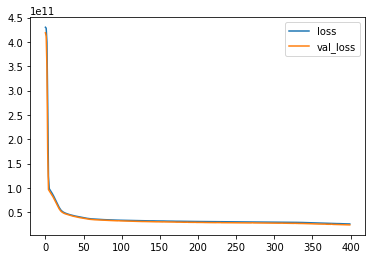

In [147]:
losses.plot()

# Evaluation

In [149]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score

In [150]:
predictions = model.predict(X_test)

In [152]:
np.sqrt(mean_squared_error (y_test, predictions))

155349.47882557934

In [153]:
mean_absolute_error(y_test, predictions)

93598.75994526428

In [154]:
df['price'].describe()

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [155]:
explained_variance_score(y_test, predictions)

0.8185997400962312

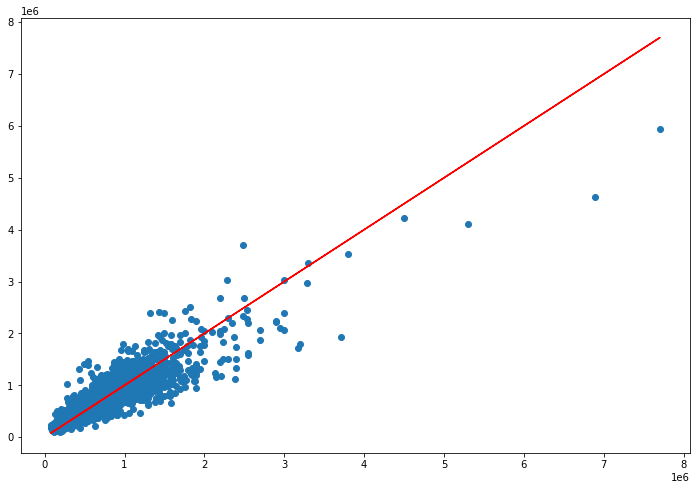

In [158]:
plt.figure(figsize=(12,8))
plt.scatter(y_test,predictions)
plt.plot(y_test,y_test, 'r')

# Predicting the price of a new house

In [159]:
single_house = df.drop('price',axis=1).iloc[0]

In [160]:
single_house = scaler.transform(single_house.values.reshape(-1, 19))

In [161]:
single_house

array([[0.2       , 0.08      , 0.08376422, 0.00310751, 0.        ,
        0.        , 0.        , 0.5       , 0.4       , 0.10785619,
        0.        , 0.47826087, 0.        , 0.57149751, 0.21760797,
        0.16193426, 0.00582059, 0.        , 0.81818182]])

In [162]:
model.predict(single_house)

array([[298619.75]], dtype=float32)

In [163]:
df.iloc[0]

price            221900.0000
bedrooms              3.0000
bathrooms             1.0000
sqft_living        1180.0000
sqft_lot           5650.0000
floors                1.0000
waterfront            0.0000
view                  0.0000
condition             3.0000
grade                 7.0000
sqft_above         1180.0000
sqft_basement         0.0000
yr_built           1955.0000
yr_renovated          0.0000
lat                  47.5112
long               -122.2570
sqft_living15      1340.0000
sqft_lot15         5650.0000
year               2014.0000
month                10.0000
Name: 0, dtype: float64